In [1]:
#Implementando um Classificador Naive Bayes Simples
#Data:31/07/2023

import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.parameters = []
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            mean = X_c.mean(axis=0)
            variance = X_c.var(axis=0)
            parameters = {"mean": mean, "variance": variance, "prior": X_c.shape[0] / X.shape[0]}
            self.parameters.append(parameters)

    def _pdf(self, X, mean, variance):
        return (1 / np.sqrt(2 * np.pi * variance)) * np.exp(-((X - mean) ** 2) / (2 * variance))

    def predict(self, X):
        likelihoods = []
        for i, c in enumerate(self.classes):
            parameters = self.parameters[i]
            prior = parameters["prior"]
            likelihood = np.prod(self._pdf(X, parameters["mean"], parameters["variance"]), axis=1)
            likelihoods.append(prior * likelihood)
        return self.classes[np.argmax(likelihoods, axis=0)]

    # Função para plotar a superfície de decisão
    def plot_decision_surface(self, X, y):
      h = .02  # Passo da grade
      x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
      y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
      xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
      grid_points = np.c_[xx.ravel(), yy.ravel()]

      Z = self.predict(grid_points)
      Z = Z.reshape(xx.shape)

      cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
      cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

      plt.figure(figsize=(8, 6))
      plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

      # Plotar os pontos de treinamento
      plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=30)
      plt.xlim(xx.min(), xx.max())
      plt.ylim(yy.min(), yy.max())
      plt.title("Superfície de Decisão do Naive Bayes")
      plt.xlabel("Feature 1")
      plt.ylabel("Feature 2")
      plt.show()

In [2]:
# Criar a base de dados 2-moons
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2, random_state=0, n_clusters_per_class=2)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)

# Dividir o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criar e treinar o Classificador Naive Bayes
nb = NaiveBayes()
nb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = nb.predict(X_test)

# Calcular a acurácia do classificador
accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do Naive Bayes: {accuracy:.2f}')

Acurácia do Naive Bayes: 0.85


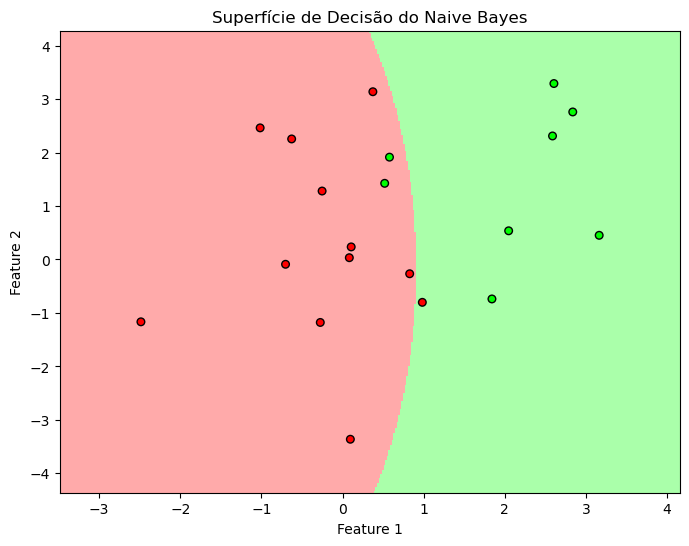

In [3]:
# Plotar a superfície de decisão do Naive Bayes no conjunto de teste
nb.plot_decision_surface(X_test, y_test)